In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# read in custom nan values
missing_values= ['N/a','na','nan''NAN','NaN',np.nan]
# make train to df
train = pd.read_csv('train.csv',na_values = missing_values , dtype = {'Id' : np.str})
test = pd.read_csv('test.csv',na_values = missing_values , dtype = {'Id' : np.str})

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   object 
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [95]:
#get rid of cols that have many null values
drop_cols = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
train.drop(columns = drop_cols,inplace=True)
test.drop(columns = drop_cols,inplace=True)

In [96]:
missing_values_count = train.isnull().sum()
missing_values_count[3:50]

LotFrontage     259
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
dtype: int64

In [97]:
train.LotFrontage[7].dtype

dtype('float64')

In [98]:
train.LotFrontage.replace(np.nan,0,inplace=True)
test.LotFrontage.replace(np.nan,0,inplace=True)


In [99]:
missing_values_count = train.isnull().sum()
missing_values_count[10:70]

LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0


In [100]:
#cols to check
col_with_errors= ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType',
                 'GarageYrBlt','GarageFinish','GarageQual','GarageCond']
train.BsmtQual.head(20)

0      Gd
1      Gd
2      Gd
3      TA
4      Gd
5      Gd
6      Ex
7      Gd
8      TA
9      TA
10     TA
11     Ex
12     TA
13     Gd
14     TA
15     TA
16     TA
17    NaN
18     TA
19     TA
Name: BsmtQual, dtype: object

In [101]:
#replacing  rating with a number to be easier to evaluate NA values using same for BsmtCond
train.replace({'BsmtQual' : {'Ex': 100 ,'Gd':95, 'TA':85,'Fa':75,'Po':65, np.nan: 0},
               'BsmtCond' : {'Ex': 100 ,'Gd':95, 'TA':85,'Fa':75,'Po':65, np.nan: 0}},inplace=True)
test.replace({'BsmtQual' : {'Ex': 100 ,'Gd':95, 'TA':85,'Fa':75,'Po':65, np.nan: 0},
              'BsmtCond' : {'Ex': 100 ,'Gd':95, 'TA':85,'Fa':75,'Po':65, np.nan: 0}},inplace=True)
train.BsmtQual.head(10)

0     95
1     95
2     95
3     85
4     95
5     95
6    100
7     95
8     85
9     85
Name: BsmtQual, dtype: int64

In [102]:
#replacing other categories with 0-x scoring 
train.replace({'BsmtExposure' : {'Gd':4, 'Av':3,'Mn':2,'No':1, np.nan: 0},
               'BsmtFinType1' : {'GLQ': 6 ,'ALQ':5, 'BLQ':4,'Rec':3,'LwQ':2, 'Unf': 1,np.nan: 0},
               'BsmtFinType2' : {'GLQ': 6 ,'ALQ':5, 'BLQ':4,'Rec':3,'LwQ':2, 'Unf': 1,np.nan: 0},
               'GarageFinish' : {'Fin':3,'RFn':2,'Unf':1, np.nan: 0},
               'GarageQual'   : {'Ex': 5 ,'Gd':4, 'TA':3,'Fa':2,'Po':1, np.nan: 0},
               'GarageCond'   : {'Ex': 5 ,'Gd':4, 'TA':3,'Fa':2,'Po':1, np.nan: 0}
              },inplace=True)
test.replace({'BsmtExposure' : {'Gd':4, 'Av':3,'Mn':2,'No':1, np.nan: 0},
               'BsmtFinType1' : {'GLQ': 6 ,'ALQ':5, 'BLQ':4,'Rec':3,'LwQ':2, 'Unf': 1,np.nan: 0},
               'BsmtFinType2' : {'GLQ': 6 ,'ALQ':5, 'BLQ':4,'Rec':3,'LwQ':2, 'Unf': 1,np.nan: 0},
               'GarageFinish' : {'Fin':3,'RFn':2,'Unf':1, np.nan: 0},
               'GarageQual'   : {'Ex': 5 ,'Gd':4, 'TA':3,'Fa':2,'Po':1, np.nan: 0},
               'GarageCond'   : {'Ex': 5 ,'Gd':4, 'TA':3,'Fa':2,'Po':1, np.nan: 0}
              },inplace=True)

In [103]:
#Replacing Missing electrical values with most common value
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [104]:
train.replace({'Electrical': {np.nan: 'SBrkr'}},inplace=True)
test.replace({'Electrical': {np.nan: 'SBrkr'}},inplace=True)

In [105]:
missing_values_count = train.isnull().sum()
missing_values_count[50:70]

BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType       81
GarageYrBlt      81
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
dtype: int64

In [106]:
#replacing garageyrblt nan values with the mean 
train.GarageYrBlt.mean()
train.replace({'GarageYrBlt': {np.nan: train.GarageYrBlt.mean()}},inplace=True)
test.replace({'GarageYrBlt': {np.nan: test.GarageYrBlt.mean()}},inplace=True)

#replace na
train.GarageType.fillna(method='bfill', axis=0, inplace=True)
test.GarageType.fillna(method='bfill', axis=0, inplace=True)

train.GarageType.isnull().sum()

0

In [107]:
missing_values_count = train.isnull().sum()
missing_values_count[50:70]
#all missing fixed

BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
dtype: int64

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores



In [108]:
#making categorical out of garagetype

train = pd.concat([train,pd.get_dummies(train['GarageType'], prefix='GarageType',dummy_na=True)],axis=1).drop(['GarageType'],axis=1)
test = pd.concat([test,pd.get_dummies(test['GarageType'], prefix='GarageType',dummy_na=True)],axis=1).drop(['GarageType'],axis=1)

In [126]:
#finding which cols to delete  by looking at their correlation
pd.set_option('display.max_columns', None)
train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,95,85,1,6,706,1,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2003.0,2,2,548,3,3,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0,1,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,95,85,4,5,978,1,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,1976.0,2,2,460,3,3,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,1,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,95,85,2,6,486,1,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2001.0,2,2,608,3,3,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,0,1,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,85,95,1,5,216,1,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,1998.0,1,3,642,3,3,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,0,0,0,0,0,1,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,95,85,3,6,655,1,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,2000.0,2,3,836,3,3,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0,1,0,0,0,0,0
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,95,85,1,6,732,1,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,1993.0,1,2,480,3,3,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000,0,1,0,0,0,0,0
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,100,85,3,6,1369,1,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,2004.0,2,2,636,3,3,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000,0,1,0,0,0,0,0
7,8,60,RL,0.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,95,85,2,5,859,4,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,1973.0,2,2,484,3,3,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000,0,1,0,0,0,0,0
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,85,85,1,1,0,1,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,1931.0,1,2,468,2,3,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900,0,0,0,0,0,1,0
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,85,85,1,6,851,1,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,1939.0,2,1,205,4,3,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000,0,1,0,0,0,0,0


In [130]:
#normalizing the data
cols_to_normalize = ['LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtQual','BsmtCond',
                    'BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                    '1stFlrSF','2ndFlrSF','LowQualFinSF'
                    ]

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([

        ('standard_scaling', StandardScaler(), cols_to_normalize)

    ], remainder='passthrough')

ct.fit_transform(train)
ct.fit_transform(test)

array([[0.6848485897728092, 0.36392912451766257, -0.7511012457179033,
        ..., 0, 0, 0],
       [0.7158515402980669, 0.8978606465841876, -0.05487715581801731,
        ..., 0, 0, 0],
       [0.4988308866212633, 0.8096458733731966, -0.7511012457179033, ...,
        0, 0, 0],
       ...,
       [3.165084631793421, 2.055149650745771, -0.7511012457179033, ...,
        0, 1, 0],
       [0.12679548031817153, 0.12552718593143716, -0.7511012457179033,
        ..., 0, 0, 0],
       [0.4988308866212633, -0.03879049231512292, 0.6413469340818686,
        ..., 0, 0, 0]], dtype=object)

In [131]:
train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

<AxesSubplot:>

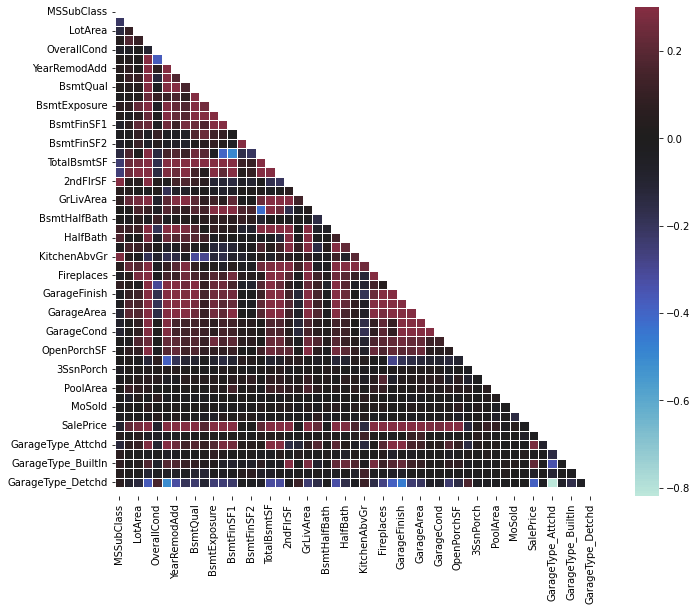

In [111]:

corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5)